In [92]:
import LSTM
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Get data, 所有数据的第0号作为训练数据，其余作为测试数据

In [93]:
data = np.load('./databygroup.npy',allow_pickle=True).tolist()
TrainData,TestData={},{}
for k in data.keys():
    if '.csv0' in k:
        TrainData[k]=data[k]
    else:
        TestData[k]=data[k]
        
#Tdata=TrainData[TrainData.keys()]
step=20
xtrain,ytrain=[],[]
for k in TrainData.keys():
    for i in range(TrainData[k].shape[0]-step-1):
        xtrain.append(TrainData[k][i:i+step,1:TrainData[k].shape[1]-4].tolist())
        ytrain.append(TrainData[k][i+1+step,[-4,-3,-2,-1]].tolist())
    #xtrain.append(xtem)
    #ytrain.append(ytem)
xtrain = Variable(torch.FloatTensor(xtrain))
ytrain = Variable(torch.FloatTensor(ytrain))

# LSTM

## 训练

Net(
  (lstm): LSTM(12, 100, num_layers=4, batch_first=True, dropout=0.5)
  (fc1): Linear(in_features=2000, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=4, bias=True)
)


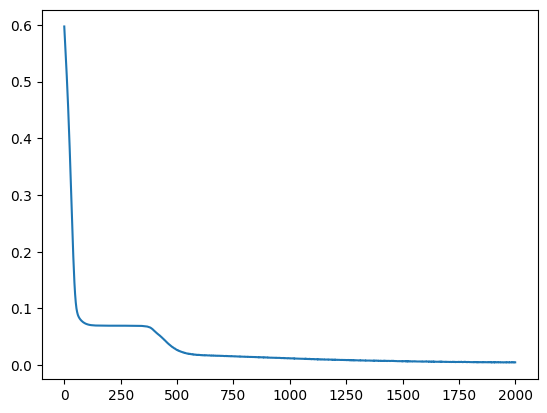

In [94]:
param={
        'inputsize':xtrain.shape[2],
        'outputsize':ytrain.shape[1],
        'windowsize':xtrain.shape[1],
        'LSTM_hidden':100,
        'num_layer':4,
        'learning_rate':0.0001,
        'opt':'Adam',
    }

train=True
initial_train=True
net = LSTM.Net(param)
print(net)
if train:
    if not initial_train:
        net.model = torch.load('./model/LSTM')
    optimizer = torch.optim.Adam(net.parameters(),lr = param['learning_rate'])
    loss_func = torch.nn.MSELoss()
    mse=[]
    for t in range(2000):
        output = net(xtrain)
        loss = loss_func(output,ytrain)
        mse.append(loss.detach().numpy())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    torch.save(net,'./model/LSTM')        
    plt.plot(mse)

# 训练并保存训练过程图

In [95]:
train=True
initial_train=True
net_tem = LSTM.Net(param)
print(net_tem)
if train:
    if not initial_train:
        net_tem.model = torch.load('./model/LSTM')
    optimizer = torch.optim.Adam(net_tem.parameters(),lr = param['learning_rate'])
    loss_func = torch.nn.MSELoss()
    mse,vmse=[],[]
    indt, indv = [i for i in range(int(xtrain.shape[0]*0.7))], [i for i in range(int(xtrain.shape[0]*0.7),int(xtrain.shape[0]))]#[np.abs(int(i)) for i in (np.random.randn(int(x.shape[0]*0.7))*x.shape[0])]
    xt, yt = xtrain[indt], ytrain[indt]
    xv, yv = xtrain[indv], ytrain[indv]
    for t in range(1000):
        output = net_tem(xt)
        loss = loss_func(output,yt)
        
        vp = net_tem(xv)
        lossv = loss_func(vp,yv)
        
        mse.append(loss.detach().numpy())
        vmse.append(lossv.detach().numpy())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Net(
  (lstm): LSTM(12, 100, num_layers=4, batch_first=True, dropout=0.5)
  (fc1): Linear(in_features=2000, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=4, bias=True)
)


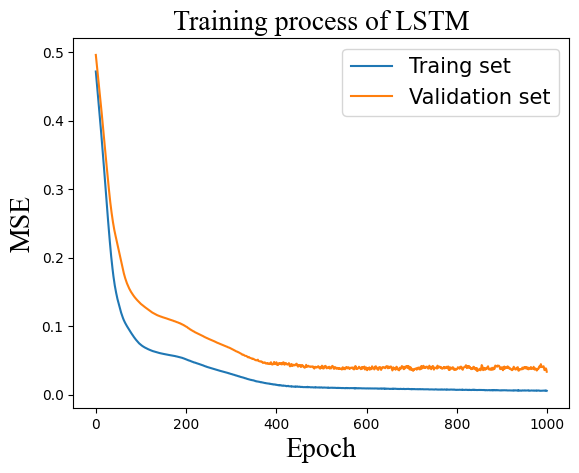

In [96]:
font1={'family':'Times New Roman','weight':'normal','size':20}
font2={'family':'Times New Roman','weight':'normal','size':10}

plt.plot(mse,label='Traing set')
plt.plot(vmse,label='Validation set')
plt.title('Training process of LSTM',font=font1)
plt.xlabel('Epoch',font=font1)
plt.ylabel('MSE',font=font1)
plt.legend(prop = {'size':15})
plt.savefig('./fig7-b.tif',bbox_inches = 'tight',dpi=200)

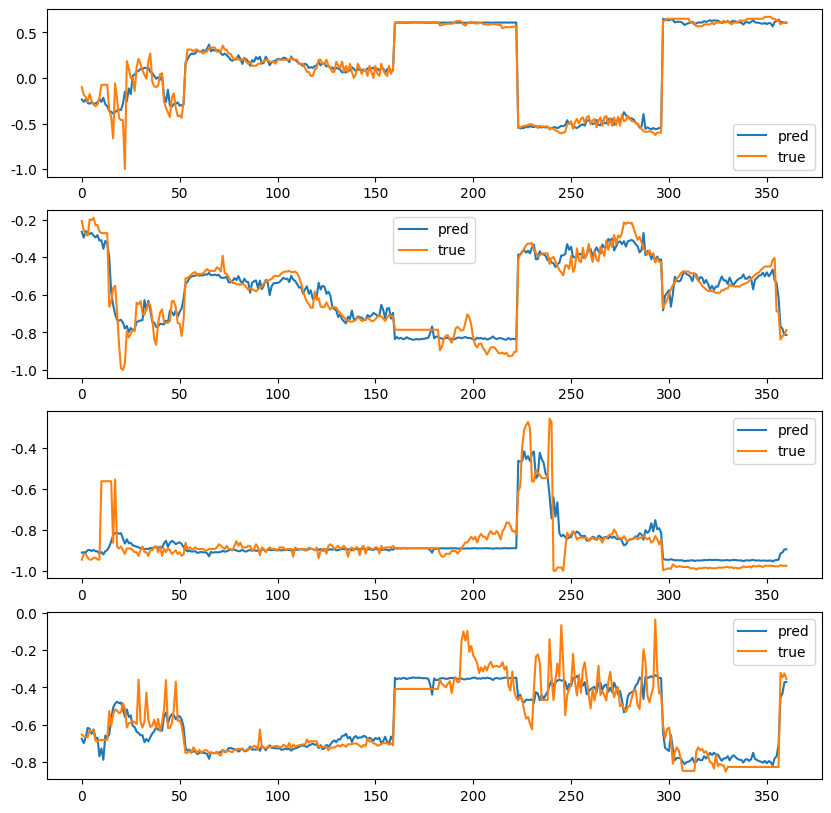

In [97]:
yp = net(xtrain)
fig,ax=plt.subplots(4,1,figsize=(10,10))
for i in range(4):
    ax[i].plot(yp.detach().numpy()[:,i],label='pred')
    ax[i].plot(ytrain.detach().numpy()[:,i],label='true')
    ax[i].legend()

## 测试

In [98]:
for f in TestData.keys():
    step=20
    xtest,ytest=[],[]
    for i in range(TestData[f].shape[0]-step-1):
        xtest.append(TestData[f][i:i+step,1:TestData[f].shape[1]-4].tolist())
        ytest.append(TestData[f][i+1+step,[-4,-3,-2,-1]].tolist())
    xtest = Variable(torch.FloatTensor(xtest))
    ytest = Variable(torch.FloatTensor(ytest))
    print(xtest.shape,f)
    yp = net(xtest)
    #mse = np.sqrt(np.mean(np.square(y1.detach().numpy()-yp.detach().numpy())))
    pd.DataFrame(yp.detach().numpy()).to_csv('./results/LSTM/results_'+f)
    
    os.chdir(os.path.pardir)
    print(os.getcwd())
    pd.DataFrame(yp.detach().numpy()).to_csv('./Step4_Compare/results_p/LSTM/results_'+f)
    os.chdir('/Users/tianwenchong/Desktop/Text12-Koopman-WQ/Step3_DNN')

torch.Size([92, 20, 12]) 80.csv1
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([425, 20, 12]) 80.csv2
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([414, 20, 12]) 80.csv3
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([11, 20, 12]) 80.csv4
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([648, 20, 12]) 80.csv5
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([209, 20, 12]) 80.csv6
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([350, 20, 12]) 80.csv7
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([527, 20, 12]) 80.csv8
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([42, 20, 12]) 80.csv9
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([784, 20, 12]) 80.csv10
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([188, 20, 12]) 80.csv11
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([286, 20, 12]) 80.csv12
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([209, 20, 12]) 80.csv13
/User